In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Define File Path
complete = "ufc_complete.csv"

# # Colab URL
# complete = 'https://raw.githubusercontent.com/GregoryRash6/Project-3/master/ufc_complete.csv'

# Read CSV
data = pd.read_csv(complete)

In [3]:
# Set Target
target = data["Winner_Blue"]

# Set Target Names
target_names = ["Lost", "Won"]

In [4]:
# Drop Winner
data = data.drop("Winner_Blue", axis=1)

# Get Feature Names
feature_names = data.columns

In [5]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [6]:
n_estimators = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
max_features = ["auto", "sqrt", "log2"]
max_depth = [5, 10, 20, 30, 40, 50]
max_depth.append(None)
min_samples_split = [2, 5, 10, 20]
min_samples_leaf = [1, 2, 5, 10, 15]

grid_params = {"n_estimators": n_estimators, 
               "max_features": max_features, 
               "max_depth": max_depth, 
               "min_samples_split": min_samples_split, 
               "min_samples_leaf": min_samples_leaf}

from sklearn.model_selection import RandomizedSearchCV

RFR = RandomForestRegressor(random_state=42)
RFR_random = RandomizedSearchCV(estimator = RFR,
                               param_distributions = grid_params,
                               n_iter = 500,
                               cv = 5,
                               verbose = 2,
                               random_state = 42,
                               n_jobs = -1)

RFR_random.fit(X_train, y_train)
print(RFR_random.best_params_)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed: 36.5min finished


{'n_estimators': 700, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 'auto', 'max_depth': 10}


In [7]:
# Create Random Forest
rf = RandomForestClassifier(n_estimators=700, 
                            random_state=42, 
                            max_depth=10, 
                            max_features = "auto", 
                            min_samples_split = 10, 
                            min_samples_leaf = 10)


# Fit Model
rf = rf.fit(X_train, y_train)

# Print Training Score
print(f"Training Score: {rf.score(X_train, y_train)}")

# Print Testing Score
print(f"Testing Score: {rf.score(X_test, y_test)}")

# Print Difference
print(f"Difference: {rf.score(X_train, y_train) - rf.score(X_test, y_test)}")

Training Score: 0.7765310892940627
Testing Score: 0.6774193548387096
Difference: 0.09911173445535304


In [8]:
# Sort & Show Important Features
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.06341033354125843, 'B_avg_SIG_STR_landed'),
 (0.05835760551395137, 'R_age'),
 (0.05466143958759433, 'R_avg_TD_pct'),
 (0.04491024107484197, 'R_avg_TD_landed'),
 (0.044089930859682346, 'B_age'),
 (0.044009186293024145, 'R_avg_SIG_STR_pct'),
 (0.04102259171768949, 'B_avg_SIG_STR_pct'),
 (0.03915482836279836, 'R_avg_SIG_STR_landed'),
 (0.030581666930316987, 'R_BMI'),
 (0.03032160281367531, 'R_losses'),
 (0.03002289277516576, 'R_total_rounds_fought'),
 (0.02896146536707132, 'elevation (ft)'),
 (0.028696315004032413, 'B_avg_TD_landed'),
 (0.02817463038838032, 'B_BMI'),
 (0.02749909056942789, 'B_avg_TD_pct'),
 (0.02708104768613924, 'R_avg_SUB_ATT'),
 (0.023550763940477788, 'B_total_rounds_fought'),
 (0.0217165949746244, 'B_avg_SUB_ATT'),
 (0.01995628044317727, 'B_Reach_cms'),
 (0.018191808397448585, 'R_Height_cms'),
 (0.01772025014385864, 'B_Height_cms'),
 (0.01717762097410781, 'R_Reach_cms'),
 (0.01585508325940535, 'R_wins'),
 (0.014576493078627248, 'R_win_by_Decision_Split'),
 (0.01391

In [9]:
# Make Predictions
predictions = rf.predict(X_test)

# Create Dataframe
compare = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

# Show First 50 Comparisons
compare.head(50)

,Prediction,Actual
0,0,1
1,0,0
2,0,1
3,0,0
4,0,0
5,0,0
6,0,1
7,0,0
8,0,1
9,0,0


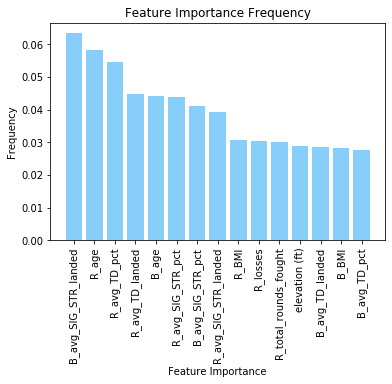

<Figure size 432x288 with 0 Axes>

In [10]:
# Save Feature Importances
results = sorted(zip(rf.feature_importances_, feature_names), reverse=True)

# Set Empty String
values = []

# Set Empty String
names = []

# Save Names & Values
for x in range(len(results)):
    values.append(results[x][0])
    names.append(results[x][1])
    
# Plot New Figure
plt.figure()

# Bar Chart
plt.bar(names[0:15], values[0:15], color='lightskyblue')

# Set XTicks
plt.xticks(names[0:15], rotation="vertical")

# Set Title
plt.title("Feature Importance Frequency")

# Set Y Label
plt.ylabel("Frequency")

# Set X Label
plt.xlabel("Feature Importance")

# Display Chart
plt.show()

# Tight Layout
plt.tight_layout()